# day 8 of data science

# ensemble learning
* bagging techniques:
    * runs multiple weak learners / alogorithms in parallel mode.
    *example : random forest 
        
* boosting techniques:
    * generally it contain 3 algo
       * adaptive boosting
        
       *gradient boosting
       * XGBoost (Xtreme Gradient Boosting)

# XGBoost

In [91]:
from xgboost import XGBClassifier

In [92]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [93]:
x = pd.read_csv("xdata.csv").values
y = pd.read_csv("ydata.csv").values

In [94]:
x = x[:, 1:]

In [95]:
y = y[:, 1:]

In [96]:
x[:5]

array([[3.516279  , 3.71975047],
       [4.60649561, 3.41437943],
       [4.67701056, 3.04724443],
       [4.15772454, 3.13867678],
       [3.15443087, 3.61985805]])

In [97]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [98]:




#splitting the data
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.1) 

In [99]:
#applying xboost to the data
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

C:\Users\akhil rawat\anaconda3\envs\datasciencetraining\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akhil rawat\anaconda3\envs\datasciencetraining\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [100]:
classifier.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [101]:
y_pred = classifier.predict(x_test)

In [102]:
y_pred

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1.])

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [104]:
accuracy_score(y_pred, y_test)*100

100.0

In [105]:
import seaborn as sns

In [106]:
cm= confusion_matrix(y_pred, y_test)

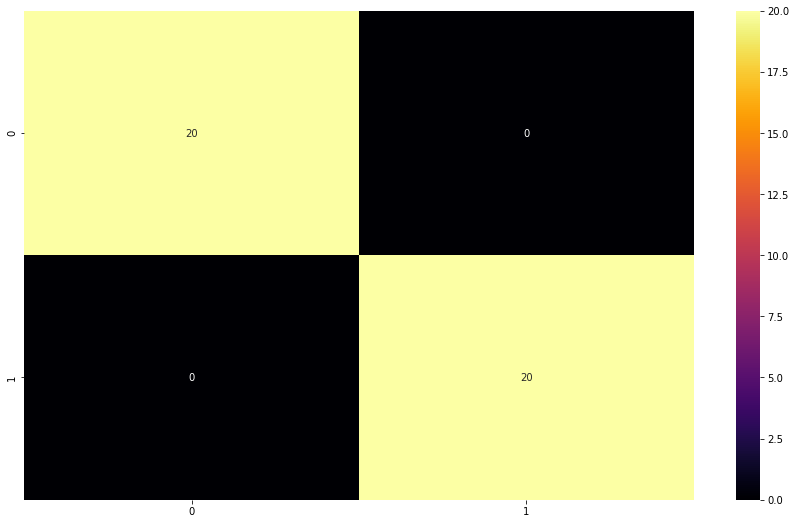

In [107]:
plt.figure(figsize = (15, 9 ))
sns.heatmap(cm , annot = True , cmap = "inferno")
plt.show()

In [108]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [109]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [110]:
arr = np.full(shape = (3,3), fill_value = 7)

In [111]:

arr

array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]])

In [112]:
#comaparing r^2 metric , array conversion
#arr = np.full(shape = len(y_test), fill_value = y_test.mean())
# r2_score(y_test, y_test)

In [113]:
mean_absolute_error(y_test,  y_pred)

0.0

In [114]:
mean_squared_error(y_test, y_pred)

0.0

# clustering Algorithm (k-means)

# choosing clusters

In [115]:
from sklearn.cluster import KMeans

In [116]:
#WCSS is used to judge hoe many clusters we should take in k means

In [117]:
wcss = []
for i in range(1,16):
    km = KMeans(n_clusters = i, random_state = 5)
    km.fit(x_train)
    wcss.append(km.inertia_)

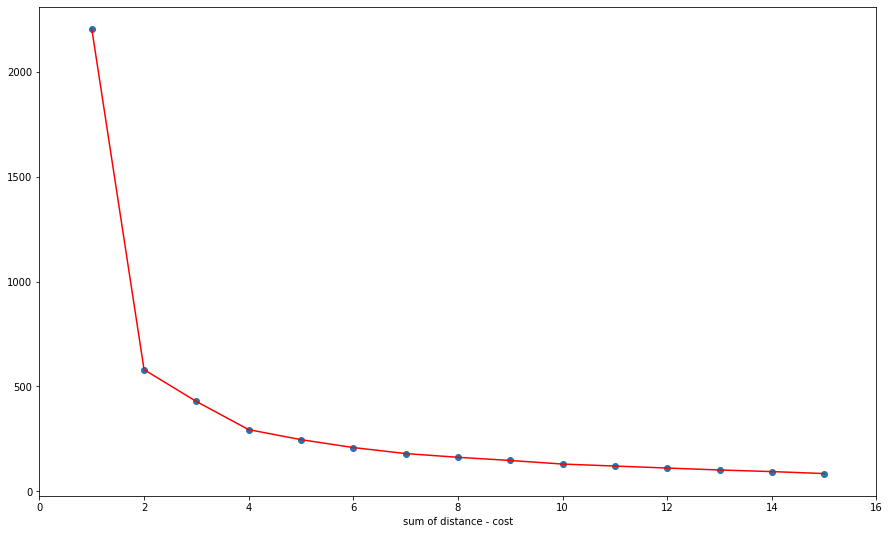

In [118]:
l= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure(figsize= (15,9))
plt.scatter(l,wcss)
plt.plot(l, wcss , c="red")
plt.xlim(0,16)
plt.xlabel("no of cluster")
plt.xlabel("sum of distance - cost")
plt.show()

In [119]:
km1  = KMeans(n_clusters =4)

In [120]:
km1.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:
y_pred = km1.predict(x_test)

In [122]:
y_pred

array([1, 1, 2, 3, 1, 0, 1, 2, 1, 0, 3, 0, 0, 2, 0, 3, 1, 0, 3, 0, 1, 0,
       0, 3, 2, 0, 3, 3, 2, 3, 2, 2, 3, 3, 3, 1, 0, 0, 0, 3])

In [123]:
#checking the center values of the cluster
km1.cluster_centers_

array([[ 3.501099  ,  3.55570534],
       [ 0.69090098,  1.60339803],
       [ 2.13638681,  4.82720155],
       [-0.73242264,  0.50096396]])

In [124]:
#checking the unique values in KMeans
np.unique(km1.labels_, return_counts = True)

(array([0, 1, 2, 3]), array([101,  90,  77,  91], dtype=int64))

# project_ [domain colour extraction]
# Kmeans 

In [125]:
import cv2

In [126]:
image = cv2.imread("bodybuilder.jpg")

In [127]:
print(image)

[[[ 7  5  4]
  [ 6  4  3]
  [ 5  3  2]
  ...
  [ 9  4  1]
  [ 9  4  1]
  [ 9  4  1]]

 [[ 7  5  4]
  [ 6  4  3]
  [ 5  3  2]
  ...
  [ 9  4  1]
  [ 9  4  1]
  [ 9  4  1]]

 [[ 7  5  4]
  [ 6  4  3]
  [ 5  3  2]
  ...
  [ 9  4  1]
  [ 9  4  1]
  [ 9  4  1]]

 ...

 [[ 9  7  6]
  [ 5  3  2]
  [11  9  8]
  ...
  [13 13  1]
  [12 12  0]
  [11 10  0]]

 [[ 8  6  5]
  [ 5  3  2]
  [11  9  8]
  ...
  [12 12  0]
  [11 10  0]
  [10  8  0]]

 [[ 8  6  5]
  [ 5  3  2]
  [11  9  8]
  ...
  [12 11  1]
  [10  9  0]
  [ 9  7  0]]]


In [128]:
print(image.shape)

(254, 412, 3)


<function matplotlib.pyplot.show(*args, **kw)>

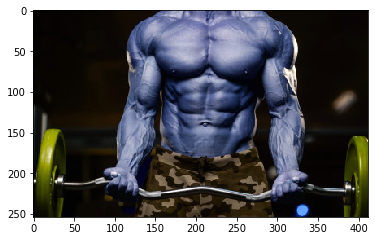

In [129]:
plt.imshow(image)
plt.show

In [130]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

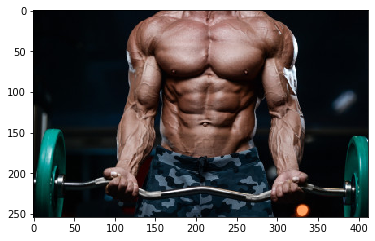

In [131]:
plt.imshow(image)
plt.show()

In [132]:
image.shape

(254, 412, 3)

In [133]:
only_pixels = image.reshape(image.shape[0]*image.shape[1], 3)

In [134]:
only_pixels.shape

(104648, 3)

In [135]:
254*412

104648

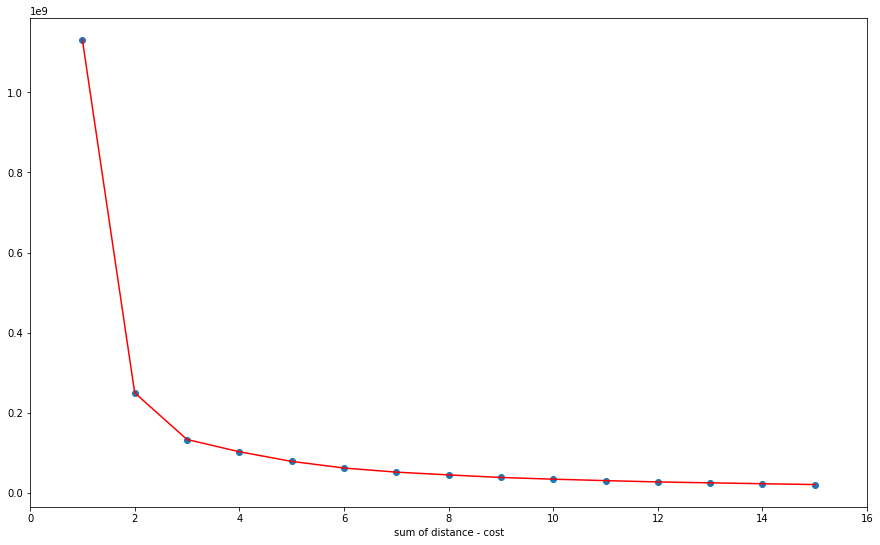

In [136]:
wcss = []
for i in range(1,16):
    km = KMeans(n_clusters = i, random_state = 5)
    km.fit(only_pixels)
    wcss.append(km.inertia_)
    
    
    
l= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure(figsize= (15,9))
plt.scatter(l,wcss)
plt.plot(l, wcss , c="red")
plt.xlim(0,16)
plt.xlabel("no of cluster")
plt.xlabel("sum of distance - cost")
plt.show()    

In [137]:
project_km = KMeans(n_clusters = 3)
project_km.fit(only_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [138]:
centers = project_km.cluster_centers_

In [139]:
centers[project_km.labels_[0]]

array([ 8.75352914, 13.60306895, 16.66523631])

In [140]:

np.unique(project_km.labels_, return_counts = True)

(array([0, 1, 2]), array([20837, 65923, 17888], dtype=int64))

In [141]:
new_image = np.full(shape = (image.shape[0]*image.shape[1], 3), fill_value =5)

In [142]:
new_image.shape

(104648, 3)

In [144]:
for i in range(new_image.shape[0]):
    new_image[i] =  centers[project_km.labels_[i]]

In [145]:
new_image = new_image.reshape(image.shape[0], image.shape[1], 3)

In [147]:
new_image.shape

(254, 412, 3)

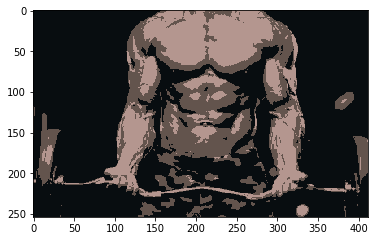

In [149]:
plt.imshow(new_image)

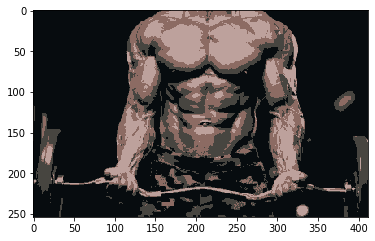

In [150]:
project_km = KMeans(n_clusters = 4)
project_km.fit(only_pixels)
centers = project_km.cluster_centers_
new_image = np.full(shape = (image.shape[0]*image.shape[1], 3), fill_value =5)
for i in range(new_image.shape[0]):
    new_image[i] =  centers[project_km.labels_[i]]
new_image = new_image.reshape(image.shape[0], image.shape[1], 3)    
plt.imshow(new_image)
plt.show()

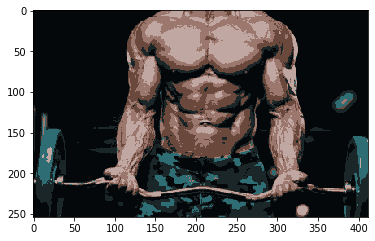

In [151]:
project_km = KMeans(n_clusters = 6)
project_km.fit(only_pixels)
centers = project_km.cluster_centers_
new_image = np.full(shape = (image.shape[0]*image.shape[1], 3), fill_value =5)
for i in range(new_image.shape[0]):
    new_image[i] =  centers[project_km.labels_[i]]
new_image = new_image.reshape(image.shape[0], image.shape[1], 3)    
plt.imshow(new_image)
plt.show()

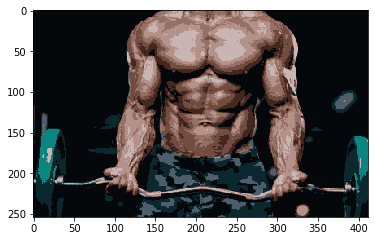

In [152]:
project_km = KMeans(n_clusters = 9)
project_km.fit(only_pixels)
centers = project_km.cluster_centers_
new_image = np.full(shape = (image.shape[0]*image.shape[1], 3), fill_value =5)
for i in range(new_image.shape[0]):
    new_image[i] =  centers[project_km.labels_[i]]
new_image = new_image.reshape(image.shape[0], image.shape[1], 3)    
plt.imshow(new_image)
plt.show()

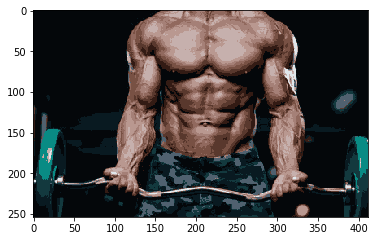

In [153]:
project_km = KMeans(n_clusters = 13)
project_km.fit(only_pixels)
centers = project_km.cluster_centers_
new_image = np.full(shape = (image.shape[0]*image.shape[1], 3), fill_value =5)
for i in range(new_image.shape[0]):
    new_image[i] =  centers[project_km.labels_[i]]
new_image = new_image.reshape(image.shape[0], image.shape[1], 3)    
plt.imshow(new_image)
plt.show()

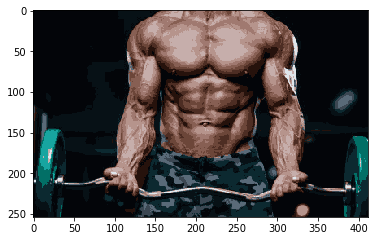

In [154]:
project_km = KMeans(n_clusters = 15)
project_km.fit(only_pixels)
centers = project_km.cluster_centers_
new_image = np.full(shape = (image.shape[0]*image.shape[1], 3), fill_value =5)
for i in range(new_image.shape[0]):
    new_image[i] =  centers[project_km.labels_[i]]
new_image = new_image.reshape(image.shape[0], image.shape[1], 3)    
plt.imshow(new_image)
plt.show()